In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


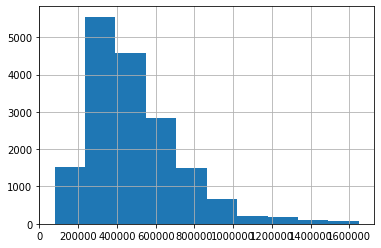

In [10]:
df['price'].hist()

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


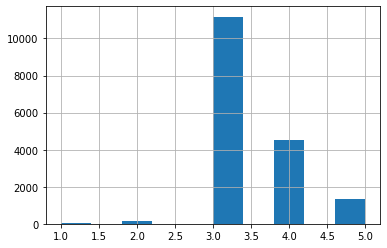

In [12]:
df['condition'].hist()

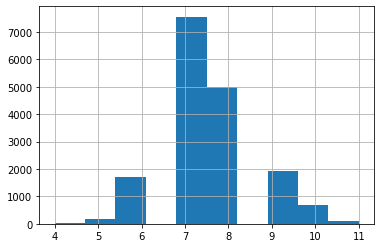

In [13]:
df['grade'].hist()

In [14]:
df['grade'].value_counts()

7     7561
8     4994
9     1936
6     1711
10     677
5      185
11     117
4       25
Name: grade, dtype: int64

In [15]:
df['waterfront'].value_counts()

0.0    17206
Name: waterfront, dtype: int64

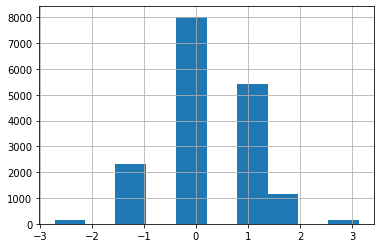

In [16]:
df['bedrooms'].hist()

In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [18]:
# tomodel = ['grade','distance_from_a_city','basement','biggerliving','biggerlot','Years_last_renovation','view']

In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [21]:
df['bedrooms'].value_counts()

-0.378652    8020
 0.791862    5416
-1.549166    2306
 1.962377    1151
-2.719680     157
 3.132891     156
Name: bedrooms, dtype: int64

In [22]:
# df = df.round({'bathrooms': 0})


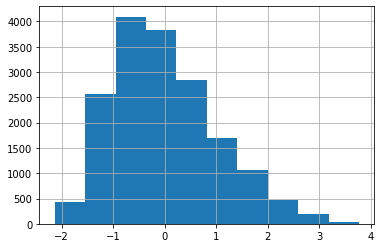

In [23]:
df['sqft_living'].hist()

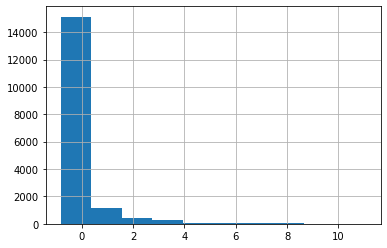

In [24]:
df['sqft_lot'].hist()

In [25]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [69]:
tomodel = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Years_last_renovation','basement','grade','bedbath']

In [70]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [71]:
X = df[tomodel]
y = df['price']

In [72]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,distance_from_a_city,Years_last_renovation,basement,grade,bedbath
bedrooms,1.000000,0.498379,0.613395,0.105611,0.060438,-0.179649,0.136273,0.345567,-0.035377
bathrooms,0.498379,1.000000,0.712744,0.057083,0.050117,-0.569961,0.131824,0.618668,-0.028101
sqft_living,0.613395,0.712744,1.000000,0.224760,0.030026,-0.363715,0.164882,0.709547,0.026305
sqft_lot,0.105611,0.057083,0.224760,1.000000,0.194143,-0.021239,-0.027258,0.135447,-0.001899
distance_from_a_city,0.060438,0.050117,0.030026,0.194143,1.000000,-0.281116,-0.214278,-0.067751,-0.074683
Years_last_renovation,-0.179649,-0.569961,-0.363715,-0.021239,-0.281116,1.000000,0.147005,-0.485990,0.109985
basement,0.136273,0.131824,0.164882,-0.027258,-0.214278,0.147005,1.000000,0.002407,-0.045691
grade,0.345567,0.618668,0.709547,0.135447,-0.067751,-0.485990,0.002407,1.000000,-0.062949
bedbath,-0.035377,-0.028101,0.026305,-0.001899,-0.074683,0.109985,-0.045691,-0.062949,1.000000


In [73]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.146e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:51:42   Log-Likelihood:                     -2.2698e+05
No. Observations:               17206   AIC:                                  4.540e+05
Df Residuals:                   17197   BIC:                                  4.540e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.451e+04   1280.333    -11.335      0.000    -1.7e+04    -1.2e+04
bathrooms              1.979e+04   1656.769     11.948      0.000    1.65e+04     2.3e+04
sqft_living            1.087e+05   1619.344     67.111      0.000    1.06e+05    1.12e+05
sqft_lot               1.017e+04   1051.788      9.665      0.000    8104.165    1.22e+04
distance_from_a_city   -1.08e+05   1079.248   -100.059      0.000    -1.1e+05   -1.06e+05
Years_last_renovation  3.357e+04   1332.657     25.191      0.000     3.1e+04    3.62e+04
basement              -2.322e+04   2156.917    -10.766      0.000   -2.74e+04    -1.9e+04
grade                  6.562e+04    180.142    364.276      0.000    6.53e+04     6.6e+04
bedbath                4664.3155    926.785      5.033      0.000    2847.722    6480.909
==============================================================================
Omnibus:                     4132.588   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16673.321
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.146e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:51:43   Log-Likelihood:                     -2.2698e+05
No. Observations:               17206   AIC:                                  4.540e+05
Df Residuals:                   17197   BIC:                                  4.540e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.451e+04   1280.333    -11.335      0.000    -1.7e+04    -1.2e+04
bathrooms              1.979e+04   1656.769     11.948      0.000    1.65e+04     2.3e+04
sqft_living            1.087e+05   1619.344     67.111      0.000    1.06e+05    1.12e+05
sqft_lot               1.017e+04   1051.788      9.665      0.000    8104.165    1.22e+04
distance_from_a_city   -1.08e+05   1079.248   -100.059      0.000    -1.1e+05   -1.06e+05
Years_last_renovation  3.357e+04   1332.657     25.191      0.000     3.1e+04    3.62e+04
basement              -2.322e+04   2156.917    -10.766      0.000   -2.74e+04    -1.9e+04
grade                  6.562e+04    180.142    364.276      0.000    6.53e+04     6.6e+04
bedbath                4664.3155    926.785      5.033      0.000    2847.722    6480.909
==============================================================================
Omnibus:                     4132.588   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16673.321
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

9 9
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.451e+04,1280.333,-11.335,0.0,-1.7e+04,-1.2e+04
bathrooms,1.979e+04,1656.769,11.948,0.0,1.65e+04,2.3e+04
sqft_living,1.087e+05,1619.344,67.111,0.0,1.06e+05,1.12e+05
sqft_lot,1.017e+04,1051.788,9.665,0.0,8104.165,1.22e+04
distance_from_a_city,-1.08e+05,1079.248,-100.059,0.0,-1.1e+05,-1.06e+05


In [76]:
X = df[x_cols]
y= df['price']

In [77]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.146e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:51:47   Log-Likelihood:                     -2.2698e+05
No. Observations:               17206   AIC:                                  4.540e+05
Df Residuals:                   17197   BIC:                                  4.540e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.451e+04   1280.333    -11.335      0.000    -1.7e+04    -1.2e+04
bathrooms              1.979e+04   1656.769     11.948      0.000    1.65e+04     2.3e+04
sqft_living            1.087e+05   1619.344     67.111      0.000    1.06e+05    1.12e+05
sqft_lot               1.017e+04   1051.788      9.665      0.000    8104.165    1.22e+04
distance_from_a_city   -1.08e+05   1079.248   -100.059      0.000    -1.1e+05   -1.06e+05
Years_last_renovation  3.357e+04   1332.657     25.191      0.000     3.1e+04    3.62e+04
basement              -2.322e+04   2156.917    -10.766      0.000   -2.74e+04    -1.9e+04
grade                  6.562e+04    180.142    364.276      0.000    6.53e+04     6.6e+04
bedbath                4664.3155    926.785      5.033      0.000    2847.722    6480.909
==============================================================================
Omnibus:                     4132.588   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16673.321
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6765225867389721),
 ('bathrooms', 2.807292148503073),
 ('sqft_living', 2.6818956673290493),
 ('sqft_lot', 1.1314101209692993),
 ('distance_from_a_city', 1.1912577038838188),
 ('Years_last_renovation', 1.8163525186933382),
 ('basement', 1.7765657676418374),
 ('grade', 1.9201576604541735),
 ('bedbath', 1.2380550349132442)]

In [79]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

9 9


In [80]:
X = df[x_cols]
y= df['price']

In [81]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.146e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:51:49   Log-Likelihood:                     -2.2698e+05
No. Observations:               17206   AIC:                                  4.540e+05
Df Residuals:                   17197   BIC:                                  4.540e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.451e+04   1280.333    -11.335      0.000    -1.7e+04    -1.2e+04
bathrooms              1.979e+04   1656.769     11.948      0.000    1.65e+04     2.3e+04
sqft_living            1.087e+05   1619.344     67.111      0.000    1.06e+05    1.12e+05
sqft_lot               1.017e+04   1051.788      9.665      0.000    8104.165    1.22e+04
distance_from_a_city   -1.08e+05   1079.248   -100.059      0.000    -1.1e+05   -1.06e+05
Years_last_renovation  3.357e+04   1332.657     25.191      0.000     3.1e+04    3.62e+04
basement              -2.322e+04   2156.917    -10.766      0.000   -2.74e+04    -1.9e+04
grade                  6.562e+04    180.142    364.276      0.000    6.53e+04     6.6e+04
bedbath                4664.3155    926.785      5.033      0.000    2847.722    6480.909
==============================================================================
Omnibus:                     4132.588   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16673.321
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6765225867389721),
 ('bathrooms', 2.807292148503073),
 ('sqft_living', 2.6818956673290493),
 ('sqft_lot', 1.1314101209692993),
 ('distance_from_a_city', 1.1912577038838188),
 ('Years_last_renovation', 1.8163525186933382),
 ('basement', 1.7765657676418374),
 ('grade', 1.9201576604541735),
 ('bedbath', 1.2380550349132442)]

In [83]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [84]:
residuals = model.resid

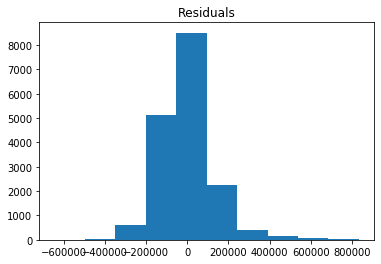

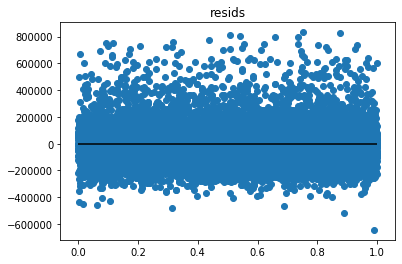

In [85]:
plot_residuals(residuals)

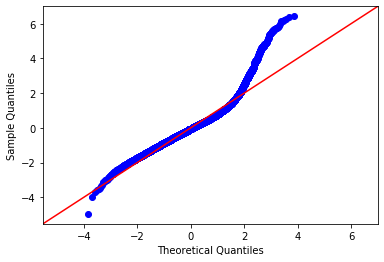

In [86]:
fig = sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True)


# Build Mode in Sklearn

In [87]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [89]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [90]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [91]:
ols.coef_

array([ -14732.56021727,   20336.2628946 ,  108886.07016318,
          9635.26570691, -107517.26321474,   33919.7312875 ,
        -25058.92843342,   65722.08615429,    4624.01077509])

In [92]:
ols.intercept_

0.0

In [93]:
# let's get our training predictions
y_train_preds = ols.predict(X_train)
y_train_preds

array([815290.13241362, 586011.85067593, 316188.21435727, ...,
       700439.03461231, 337770.12577   , 400530.67927913])

In [94]:
r2_score(y_train, y_train_preds)

0.6968750658198528

In [95]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [96]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.6968750658198528

In [97]:
testing_score = ols.score(X_test, y_test)
testing_score

0.713885872638047

In [98]:
cv_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
# cv breaks your data into that many equal pieces 
cv_scores

0.6981782890918067

In [99]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    print(f"train score = {train_score}")
    print(f"test score = {test_score}")
    return ols

In [63]:
make_ols_sklearn(X, y)

train score = 0.710075170915688
test score = 0.6864462195669506


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [64]:
make_ols_sklearn(X, y)

train score = 0.7036966333732857
test score = 0.7115197483003837


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [65]:
make_ols_sklearn(X, y)

train score = 0.7042241866634101
test score = 0.7093284346498551


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [66]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [67]:
import seaborn as sns

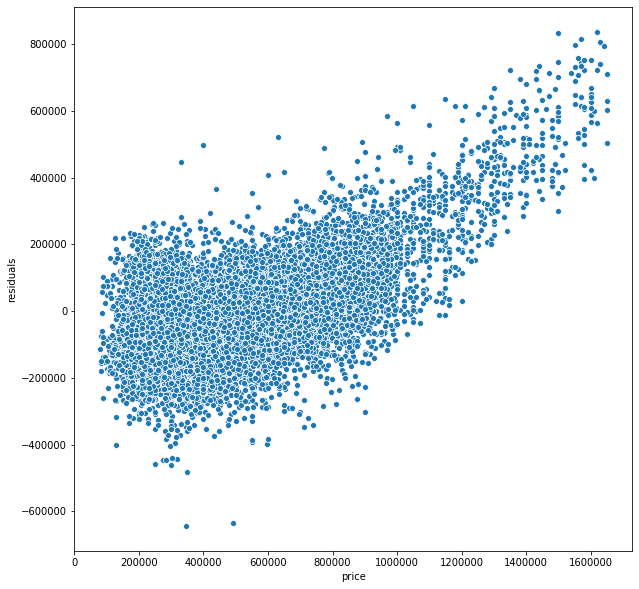

In [68]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)